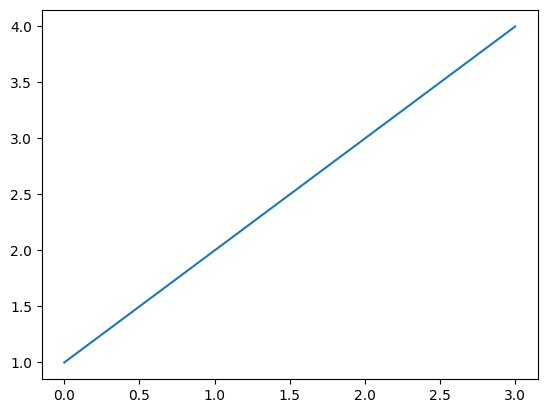

In [4]:
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from IPython.display import display

import numpy as np
import json

# Include this line to enable inline plotting in Jupyter Notebook
%matplotlib inline


def process_image(image_path):
    # Extract the filename without extension to use as label
    label = os.path.splitext(os.path.basename(image_path))[0]
    img_np = Image.open(image_path)
    #img_np = mpimg.imread(image_path)
    img = Image.fromarray(img_np, "RGB")

    #img = Image.fromarray(img_np.astype("uint8"), "RGB")
    x, y = img.size

    fig, ax = plt.subplots(1, figsize=(15, 15))
    ax.imshow(img_np)

    # You need to replace the following line with your actual code to get detections
    # detections = json.loads(resp)

    # For the purpose of testing, I'll use a placeholder for detections
    detections = [{"boxes": [{"label": label, "box": {"topY": 0.1, "topX": 0.1, "bottomY": 0.9, "bottomX": 0.9}, "score": 0.8}]}]

    for detect in detections[0]["boxes"]:
        if detect["label"] == label:
            box = detect["box"]
            conf_score = detect["score"]
            if conf_score > 0.6:
                ymin, xmin, ymax, xmax = (
                    box["topY"],
                    box["topX"],
                    box["bottomY"],
                    box["bottomX"],
                )
                topleft_x, topleft_y = x * xmin, y * ymin
                width, height = x * (xmax - xmin), y * (ymax - ymin)
                color = np.random.rand(3)
                rect = patches.Rectangle(
                    (topleft_x, topleft_y),
                    width,
                    height,
                    linewidth=3,
                    edgecolor=color,
                    facecolor="none",
                )
                ax.add_patch(rect)
                plt.text(topleft_x, topleft_y - 10, label, color=color, fontsize=20)

    display(plt.show())
    display(plt.gcf())
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.show()


# Replace the path with your actual path
for image_path in glob.glob("D:/asdf/new_project/Train_data/Valid/*.tiff"):
    process_image(image_path)